# Customer segmentation using Kmeans Clustering

## Step 1 : Import Dependencies

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('DATA/Mall_Customers.csv',
                 index_col=0,
                header=0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


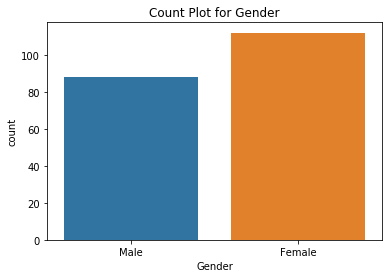

In [9]:
# count plot on a single categorical variable 
sns.countplot(x = 'Gender', data = df)
# show the plot

plt.title("Count Plot for Gender")
plt.show()

In [4]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

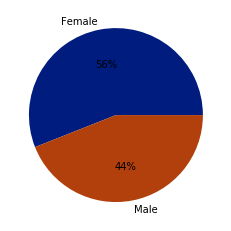

In [5]:
# declaring data 
data = [112, 88]
keys = ['Female', 'Male']

# declaring exploding pie
explode = [0,0]

# define Seaborn color palette to use
palette_color = sns.color_palette('dark')

# plotting data on chart 
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%.0F%%')

# displaying chart
plt.show()

In [8]:
sns.__version__

'0.11.2'

# use this code when the library is'nt supported or an unsupported version use 'sns.__version__' this check version & then use this 'pip install and the version that is supported ' to run the code .

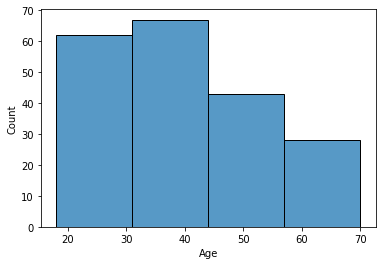

In [7]:
# Plot histogram
sns.histplot(data = df,
             x="Age",
             bins=4,
             kde = False)
plt.show()

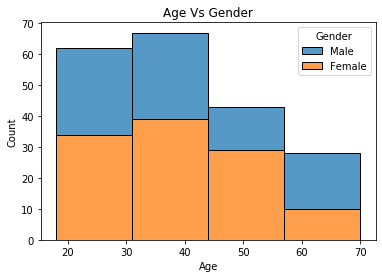

In [11]:
# Plot histogram
sns.histplot(data = df,
             x="Age",
             bins=4,
             hue="Gender",
             multiple="stack",
             kde = False)
plt.title("Age Vs Gender")
plt.show()

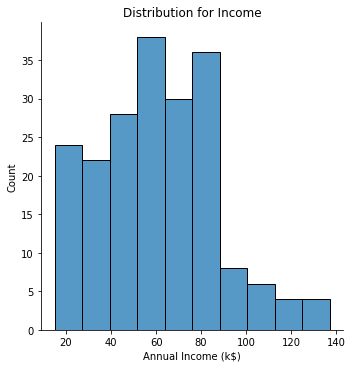

In [16]:
sns.displot(df, x="Annual Income (k$)")
plt.title("Distribution for Income")
plt.show()

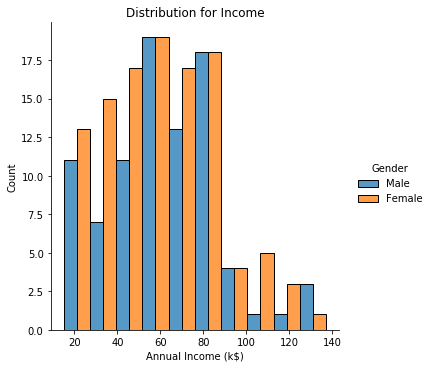

In [26]:
sns.displot(df, x="Annual Income (k$)", hue="Gender", multiple='dodge')
plt.title("Distribution for Income")
plt.show()

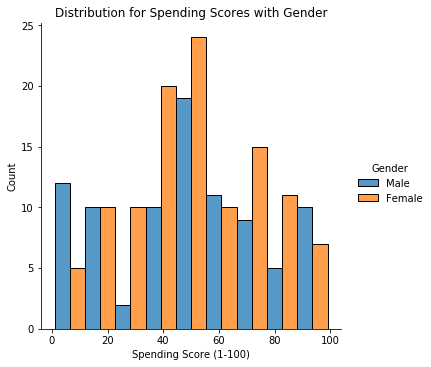

In [27]:
sns.displot(df, x="Spending Score (1-100)", hue="Gender", multiple='dodge')
plt.title("Distribution for Spending Scores with Gender")
plt.show()

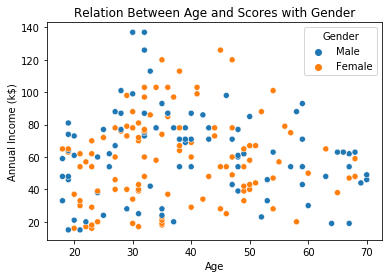

In [33]:
sns.scatterplot(data=df, x="Age", y="Annual Income (k$)", hue="Gender")
plt.title("Relation Between Age and Scores with Gender")
plt.show()

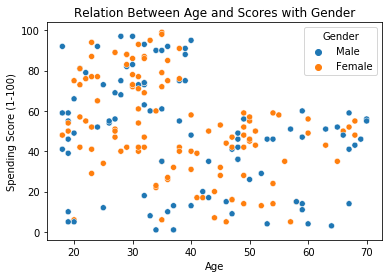

In [34]:
sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)", hue="Gender")
plt.title("Relation Between Age and Scores with Gender")
plt.show()

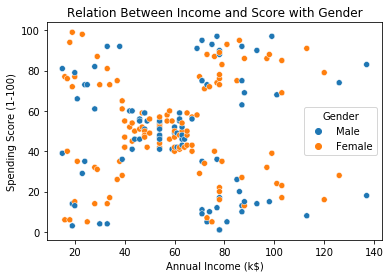

In [35]:
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender")
plt.title("Relation Between Income and Score with Gender")
plt.show()

In [38]:
print(df.shape)
print(df.info())
print(df.isnull().sum())

(200, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 17.8+ KB
None
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [39]:
df.describe(include="all")

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [40]:
df.describe(include="all")

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


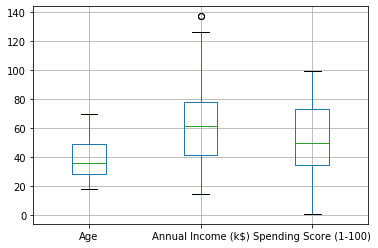

In [41]:
df.boxplot()
plt.show()

In [42]:
X = df.iloc[: , 2:4] # [ Start_row : stop_row, start_col : stop_col]

In [43]:
X

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


In [46]:
%%time

#Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans 
from tqdm import tqdm_notebook as tqdm 

K_MAX = 15
wsse = []
#progress bar
with tqdm (total=K_MAX-1) as pbar:
    for i in range (1, K_MAX):
        
        
        kmeans = KMeans(n_clusters = i,  random_state = 10)
        kmeans.fit(X)
        wsse.append(kmeans.inertia_)
        pbar.update(1)


Wall time: 989 ms


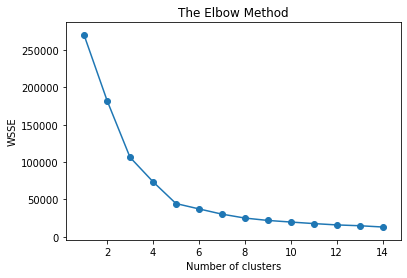

In [47]:


plt.plot(range(1,K_MAX), wsse)
plt.scatter(range(1,K_MAX),wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

In [48]:
print(wsse[4])

44448.45544793371


In [49]:
#fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, random_state = 10)
Y_pred = kmeans.fit_predict(X)

In [50]:
Y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [51]:
kmeans.n_iter_

3

In [52]:
df["Clusters"]=Y_pred
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,2
2,Male,21,15,81,3
3,Female,20,16,6,2
4,Female,23,16,77,3
5,Female,31,17,40,2
6,Female,22,17,76,3
7,Female,35,18,6,2
8,Female,23,18,94,3
9,Male,64,19,3,2


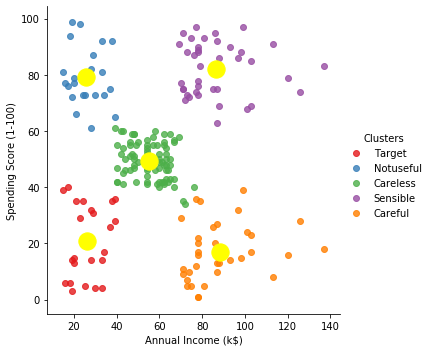

In [56]:
sns.lmplot(data=df,
          x='Annual Income (k$)',
          y='Spending Score (1-100)',
          fit_reg=False, #no regression line
          hue='Clusters',
          palette="Set1")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s = 300, c = 'yellow')
plt.show()

In [54]:
df["Clusters"]=df.Clusters.map({0:"Careless", 1:"Sensible",2:"Target",
                               3:"Notuseful", 4:"Careful"})

In [55]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,Target
2,Male,21,15,81,Notuseful
3,Female,20,16,6,Target
4,Female,23,16,77,Notuseful
5,Female,31,17,40,Target


In [57]:
df.to_excel(r"TargetCustomers.xlsx",index=True)